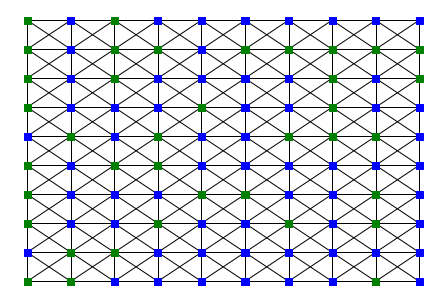

In [16]:
#preferential attachment with 100 people per node

import random
from random import choice
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

cluster_within_param = 0
cluster_adjacent_param = 0

gn = 5
k = 2
ns = 50
p = 0.2

dual_graph_list = []

for i in range(1):

    graph = nx.grid_graph([k * gn, k * gn])
        
    # this part adds queen adjacency
    for i in range(k*gn-1):
        for j in range(k*gn):
            if j<(k*gn-1):
                graph.add_edge((i,j),(i+1,j+1))
                graph[(i,j)][(i+1,j+1)]["shared_perim"]=0
            if j >0:
                graph.add_edge((i,j),(i+1,j-1))
                graph[(i,j)][(i+1,j-1)]["shared_perim"]=0
    
    
    #make all people majority
    for n in graph.nodes():
        graph.node[n]["population"] = 100
        graph.node[n]["majority"] = 100
        graph.node[n]["minority"] = 0

    #pick a random person to be minority
    random.seed()
    random_node = choice(list(graph.nodes()))
    graph.node[random_node]["majority"]=99
    graph.node[random_node]["minority"]=1

    #Pick p percent of people to be purple

    for i in range(int(p*100*len(graph.nodes()))):
    #for i in range(1):
        population = []
        weights = []

        for n in graph.nodes():
            minority_adjacent = 0
            for nbr in graph.neighbors(n):
                minority_adjacent += graph.nodes[nbr]["minority"]
            if graph.nodes[n]["minority"] < 100:
                population.append(n)
                minority_within = graph.nodes[n]["minority"]
                #exponential weights
                #weights.append(cluster_within_param**minority_within + cluster_adjacent_param**minority_adjacent)
                #multiplicative weights
                weights.append((minority_within+1)**cluster_within_param + (minority_adjacent+1)**cluster_adjacent_param)                
        sample = random.choices(population, weights)
        graph.node[sample[0]]["majority"] -= 1
        graph.node[sample[0]]["minority"] += 1

    cdict = {}
    for n in graph.nodes():
        if graph.node[n]["minority"] > 80:
            cdict.update({graph.node[n]["minority"]: "red"})
        elif graph.node[n]["minority"] > 60:
            cdict.update({graph.node[n]["minority"]: "orange"})
        elif graph.node[n]["minority"] > 40:
            cdict.update({graph.node[n]["minority"]: "yellow"})
        elif graph.node[n]["minority"] > 20:
            cdict.update({graph.node[n]["minority"]: "green"})
        elif graph.node[n]["minority"] > 0:
            cdict.update({graph.node[n]["minority"]: "blue"})
        else:
            cdict.update({graph.node[n]["minority"]: "black"})
            

    plt.figure()
    nx.draw(
        graph,
        pos={x: x for x in graph.nodes()},
        node_color=[cdict[graph.node[x]["minority"]] for x in graph.nodes()],
        #node_color=range(100), cmap=plt.cm.Blues,
        node_size=ns,
        node_shape="s",
    )
    plt.show()
    dual_graph_list.append(graph)

In [30]:
range(10)[1]

1